In [1]:
from models_management import *
from tmfg_bootstrapped import *
from bootstrapped_network import *

import pandas as pd
import numpy as np
import networkx as nx
import holoviews as hv

import matplotlib.pyplot as plt

/Users/antonio/Envs/Tensorflow_Env/env/lib/python3.8/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn(


In [2]:
dm = DataManager(dataset_id=15, seed=82)
X_train, X_val, X_test, y_train, y_val, y_test = dm.get_data()

In [3]:
cliques, separators, adjacency_matrix = Bootstrapped_Network(X_train, 
                                                             'pearson',
                                                             100,
                                                             95, 
                                                             'similarity_matrix', 
                                                             parallel=True).compute_bootstrapping()

original_tmfg = adjacency_matrix

c = nx.degree_centrality(adjacency_matrix)

keys = np.array(list(c.keys()))
values = np.array(list(c.values()))
nodes_list = sorted(list(keys[values != 0]))

simplexes = []

x = None
x_train = None
x_val = None
x_test = None

for i in nx.enumerate_all_cliques(original_tmfg):
    if len(i) == 2:
        simplexes.append(sorted(i))

b_cliques_4 = []
b_cliques_3 = []
b_cliques_2 = []

b_cliques_all = nx.enumerate_all_cliques(adjacency_matrix)

for i in b_cliques_all:
    if len(i) == 2:
        b_cliques_2.append(sorted(i))
    if len(i) == 3:
        b_cliques_3.append(sorted(i))
    if len(i) == 4:
        b_cliques_4.append(sorted(i))

final_b_cliques_4 = []

for c in cliques:
    if sorted(c) in b_cliques_4:
        final_b_cliques_4.append(sorted(c))

final_b_cliques_3 = []

for c in separators:
    if sorted(c) in b_cliques_3:
        final_b_cliques_3.append(sorted(c))

final_b_cliques_2 = []

for c in simplexes:
    if sorted(c) in b_cliques_2:
        final_b_cliques_2.append(sorted(c))

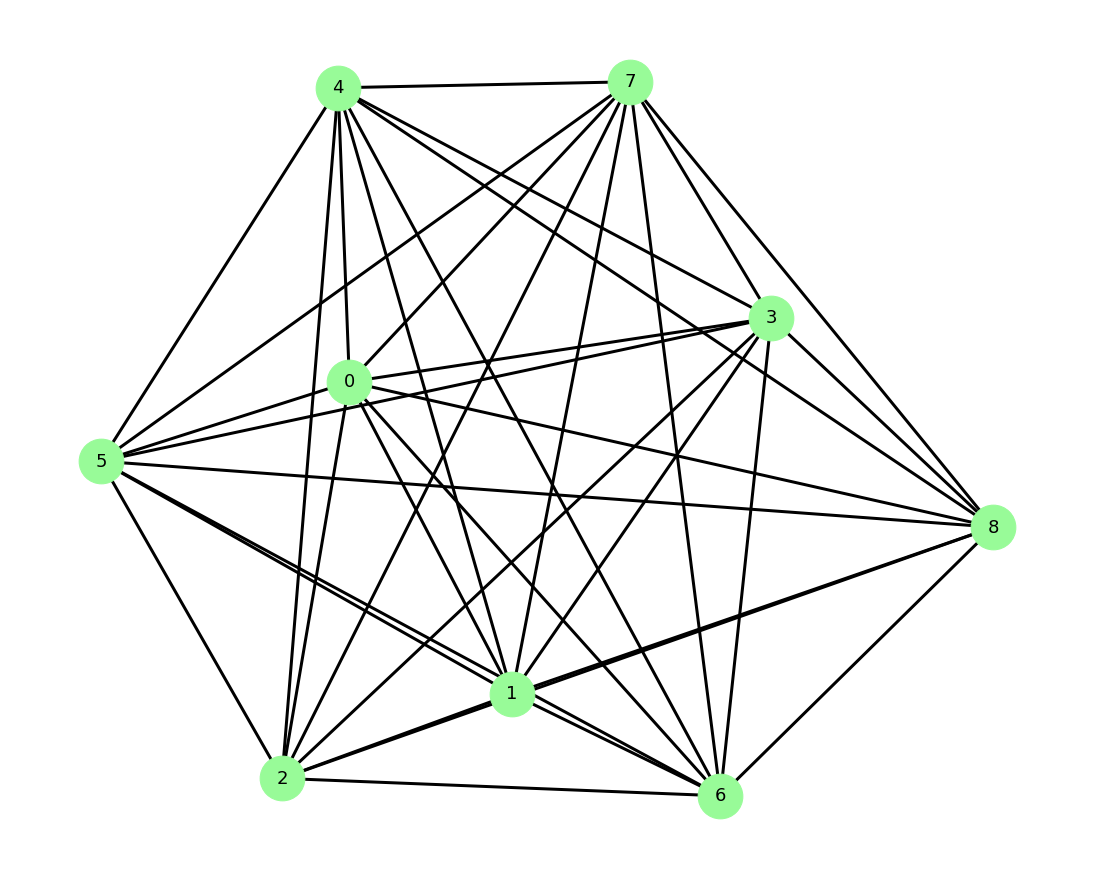

In [8]:
plt.figure(figsize=(15,12))
similarity_matrix = nx.from_pandas_adjacency(pd.DataFrame(X_train).corr())
similarity_matrix.remove_edges_from(nx.selfloop_edges(similarity_matrix))
nx.draw(similarity_matrix, with_labels=True, node_size=2000, width=3, font_size=18, node_color='palegreen')

In [ ]:
plt.figure(figsize=(12,8))
nx.draw(original_tmfg, with_labels=True, node_size=2000, width=3, font_size=18, node_color='palegreen', pos = nx.nx_pydot.graphviz_layout(original_tmfg))
plt.savefig(f'./IMAGES/complete.pdf')

In [ ]:
for n,s in enumerate(final_b_cliques_4): 
    H = original_tmfg.subgraph(s)
    nx.draw(H, with_labels=True, node_size=2000, width=3, font_size=18, node_color='orange')
    plt.savefig(f'./IMAGES/THETRAEDRA/{n}.pdf')
    plt.show()

In [ ]:
for n,s in enumerate(final_b_cliques_3): 
    H = original_tmfg.subgraph(s)
    nx.draw(H, with_labels=True, node_size=2000, width=3, font_size=18, node_color='salmon')
    plt.savefig(f'./IMAGES/TRIANGLES/{n}.pdf')
    plt.show()

In [ ]:
for n,s in enumerate(final_b_cliques_2): 
    H = original_tmfg.subgraph(s)
    nx.draw(H, with_labels=True, node_size=2000, width=3, font_size=18, node_color='deepskyblue')
    plt.savefig(f'./IMAGES/SIMPLEX/{n}.pdf')
    plt.show()